In [20]:
from desdeo_mcdm.utilities.solvers import solve_pareto_front_representation
from desdeo_emo.EAs import NSGAIII
from modules.utils import save
from modules.GeometryDesign.problem import create_problem
import numpy as np
import warnings
warnings.filterwarnings("ignore") # ignore warnings :)


# Creating geometry design problem : tent like buildings
# Which objectives do you wish to optimize
# surface area, volume, min height and floor area
obj = np.array([
    True, True, True, True, # Optimizing Surface area and min height and ignoring others,
])

# ideal and nadir in respective order
# ideal = 0, 1, 1, 1
# nadir = 5, 0, 0, 0


# Set constraint for objectives, [lower, upper]
# If no constraint then set it to None
# Each row represents a objective function in the same order as in obj_gd 
# Notice that breaking constraints will result in a penalty and therefore we might get results that break the constraints
constraints = np.array([
    [0.2, None], # Surface area > 0.2
    [.5, .8], # .5 < volume < .8. Even though we're not optimizing volume, we can set a constraint on it  
    [.4, None], #  min height > .4
    [None, 0.6], # floor area < .6 
])

# How many 3d points should the hull be formed of
# more points => More complex problem : longer execution times
# Less points => More likely to fail in constructing the hull
variable_count = 15 # Around 15 - 25 seems to be good enough

# To create the problem we can call the gd_create method with the parameters defined earlier
# the pfront argument should be set to True if using the solve_pareto_front_representation method as it doesn't 
# take account minimizing/maximizing. For everything else we can set it to False
# The method returns a MOProblem and a scalarmethod instance which can be passed to different Desdeo objects
problem, method = create_problem(variable_count , obj, constraints, pfront = True)

# Two methods to solve the problem are shown below. Do not use them both at the same time!
# Use one, and comment out the other!

# Example on solving the pareto front : This might take some time so feel free to comment this out (lines 57 and 60).

# We will use the solve_pareto_front_representation method but one can change this to something else.
# The method takes the problem instance and a step size array

# The method will create reference points from nadir to ideal with these step sizes
# in this case : ref points = [[5,0,0,0], [4.5, 0, 0, 0], [4, 0, 0, 0] ... [5, 0.2, 0, 0] ... [0, 1, 1, 1]]
# large step sizes => less solutions but faster calculation
# step_sizes = np.array([.5, .2, .2, .2])[obj]

# # The method returns the decision vectors and corresponding objective vectors
# var, obj = solve_pareto_front_representation(problem, step_sizes, solver_method= method)

# Example on solving the pareto front using NSGA-III

evolver = NSGAIII(problem,
                  n_iterations=10,
                  n_gen_per_iter=100,
                  population_size=100)

while evolver.continue_evolution():
    evolver.iterate()

var, obj = evolver.end()

# save the solution if you wish, make sure to change the name to not accidentally overwrite an existing solution.
# Saved solutions can be used later to visualize it
# The solution will be saved to modules/DataAndVisualization/'name'
# save("gdExample", obj, var, problem.nadir, problem.ideal)


In [34]:
import plotly.graph_objects as go
fig2 = go.Figure(data=go.Scatter(x=obj[:,0],
                                   y=obj[:,1],
                                   mode="markers",
                                   marker_size=5))
fig2

In [28]:
from  modules.DataAndVisualization.vizualiser import (
    plot_scatter as scatter,
    plot_parallel as parallel,
)
axis_names = ["surface area", "volume", "height", "floor area"]

obj[:,1] = -obj[:,1]
obj[:,2] = -obj[:,2]
obj[:,3] = -obj[:,3]
parallel(obj, axis_names)

In [23]:
import pandas as pd
df = pd.DataFrame(var)
df.to_csv("decision_vectors_4.csv")

df = pd.DataFrame(obj)
df.to_csv("decision_objectives_4.csv")

Text(0, 0.5, 'Volume')

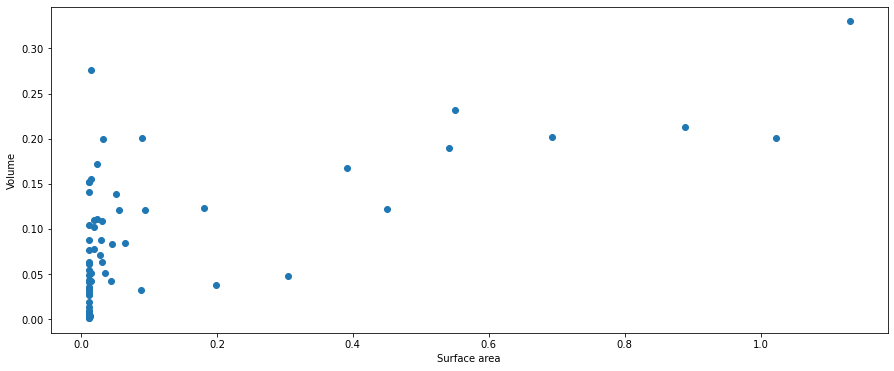

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))
plt.scatter(obj[:,0],obj[:,1])
plt.xlabel("Surface area")
plt.ylabel("Volume")

(8, 3)
0.3298474923438282


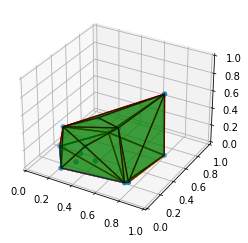

0.20036569653200925


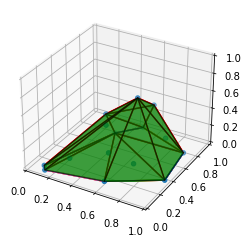

0.21292860909248199


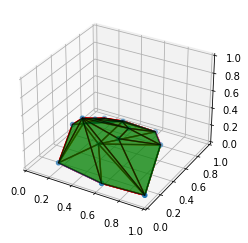

0.20181884138027278


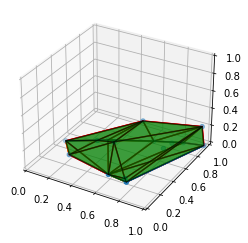

0.23137164421252893


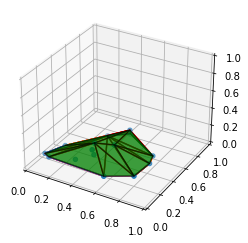

0.12194864097541538


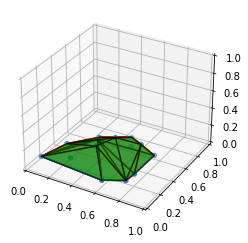

0.18967637444569757


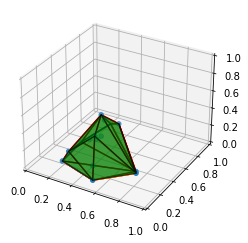

0.1669896765716965


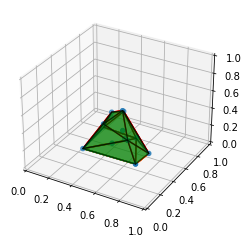

0.04764165815478319


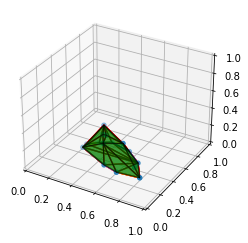

0.038019375131969166


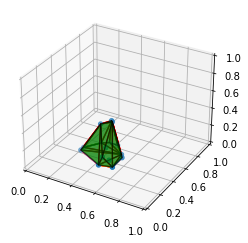

0.12288574533910662


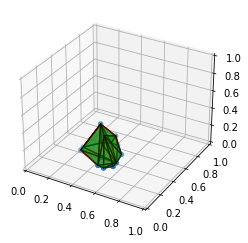

0.20013960151482715


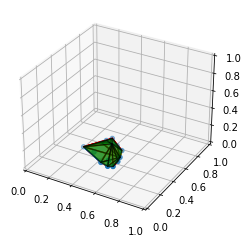

0.12092534513265135


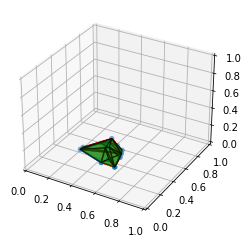

0.03178125710490973


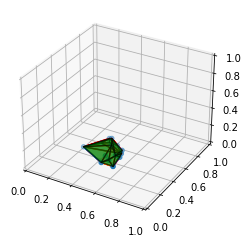

0.0838370957446048


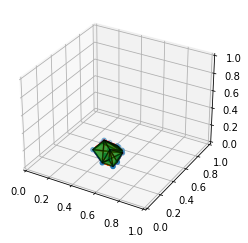

0.12076158598412631


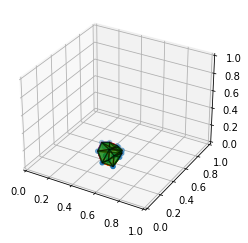

0.1385970889095403


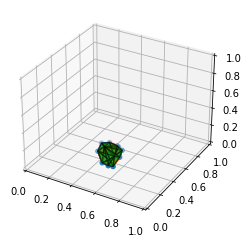

0.04224209767337234


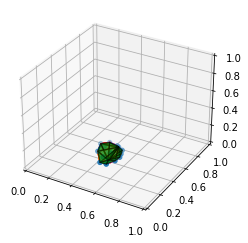

0.08333631089326832


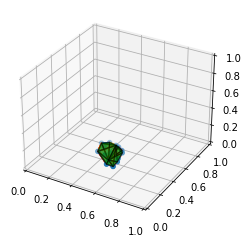

0.051099347799043265


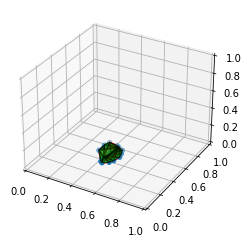

0.1992345944494019


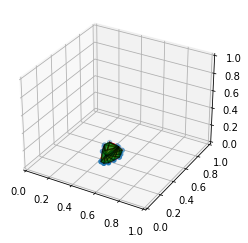

0.10874064294133433


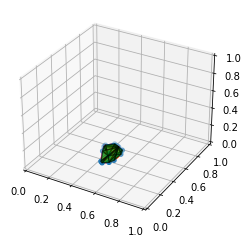

0.06366953691558222


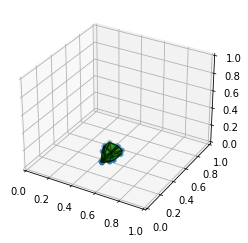

0.0874865912278586


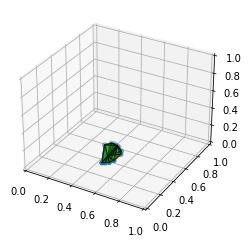

0.0706588866828393


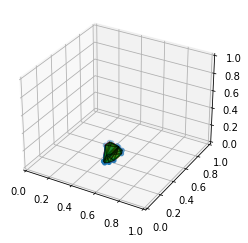

0.17175882108042126


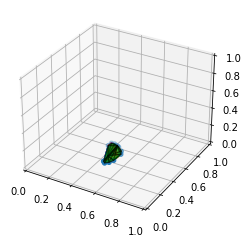

0.11131214333849195


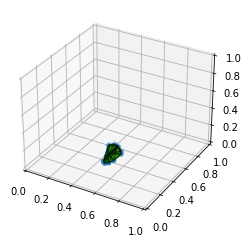

0.07787792702737166


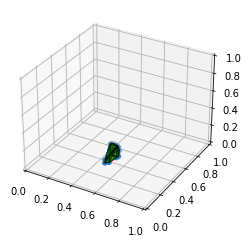

0.10967134205982222


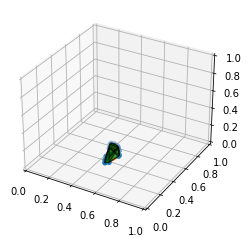

0.10258322205759364


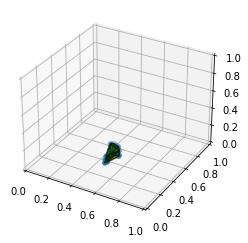

0.155405715524343


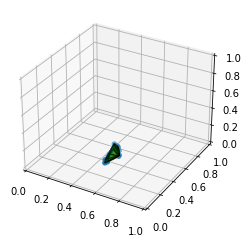

0.2758996107542675


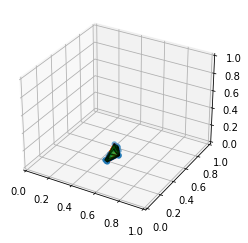

0.051215623585188434


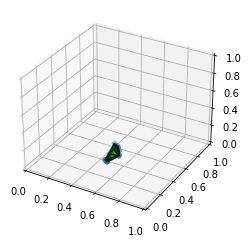

0.0033502240643564466


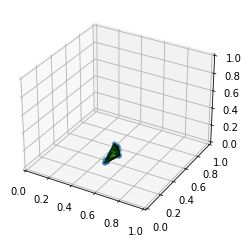

0.0036228756764065955


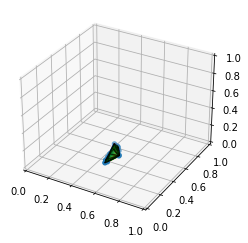

0.04241788806050079


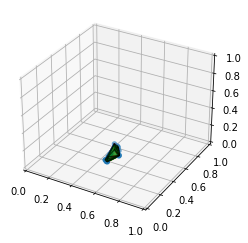

0.14075418366678683


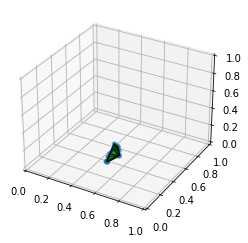

0.1041271965335509


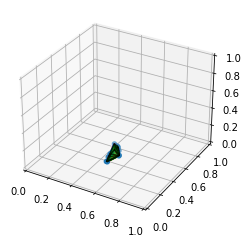

0.04855560785113465


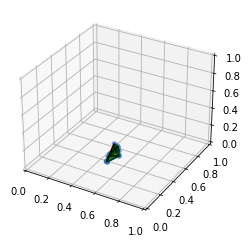

0.0333042400785966


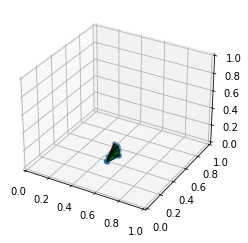

0.06142631247814003


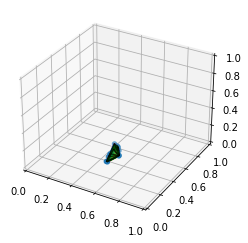

0.0433266106900172


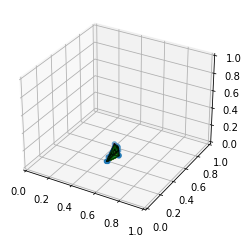

0.002494163444563077


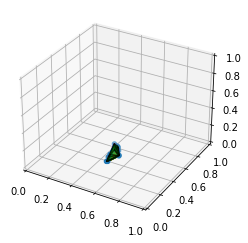

0.04138888880432721


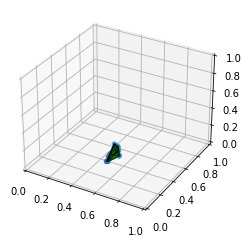

0.0036090044241096648


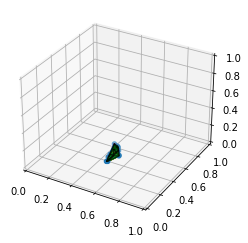

0.07687259509954987


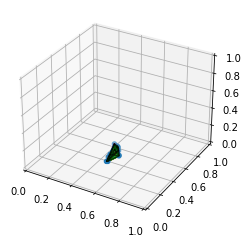

0.004630129688598541


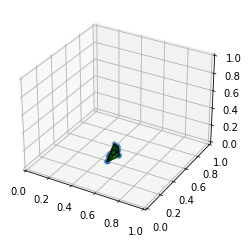

0.00442374217102582


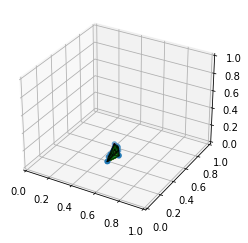

0.006038358372255905


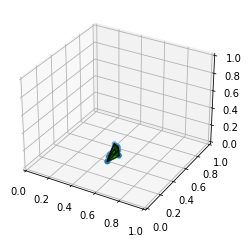

0.013110310596587132


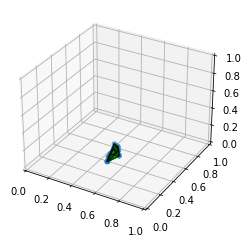

0.0027705488330930605


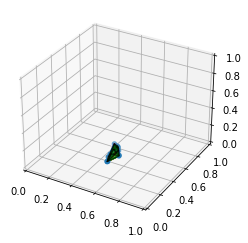

0.0038334903937745166


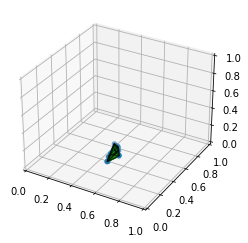

0.0019999195159830624


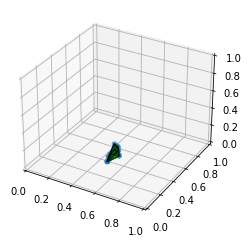

0.008694139545441924


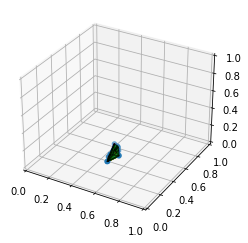

0.003779022135562185


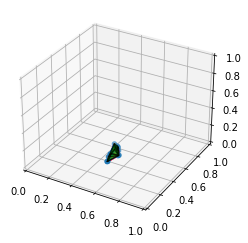

0.026503873329660716


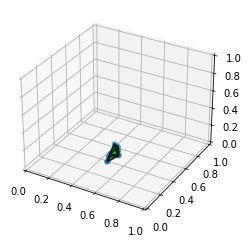

0.0037130070404556795


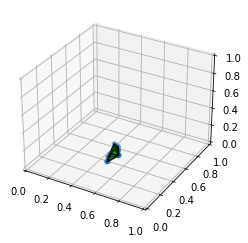

0.15185585228415724


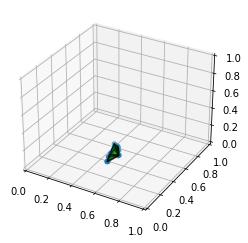

0.05467143497391839


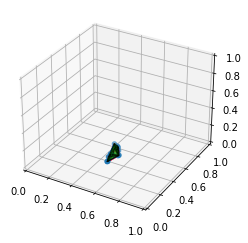

0.009215001929204965


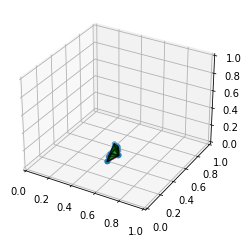

0.0051851480408954785


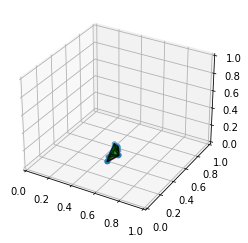

0.019009823453198516


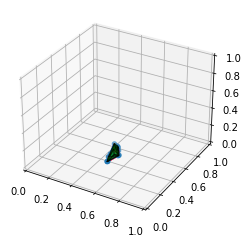

0.0346943911029176


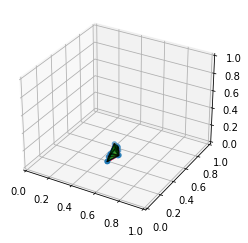

0.0014556524685558304


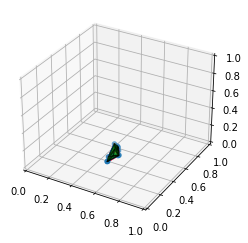

0.004234843470191457


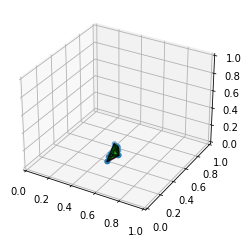

0.004143347587416304


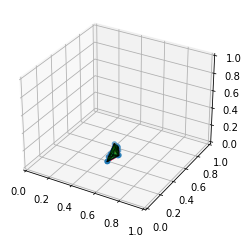

0.06333262490317199


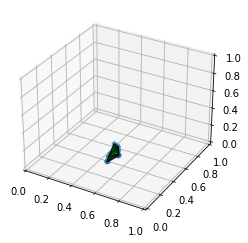

0.029918163554139628


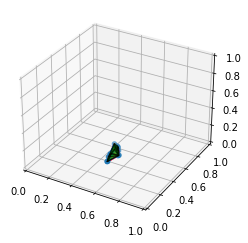

0.08724445132042256


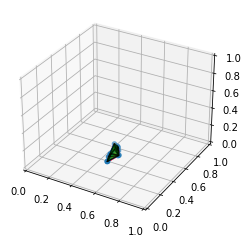

0.15167312812453587


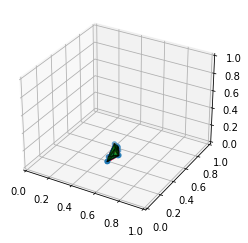

0.0011940560703570862


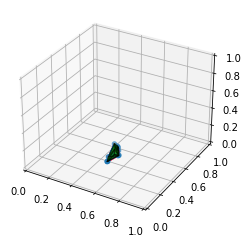

0.035401514563168264


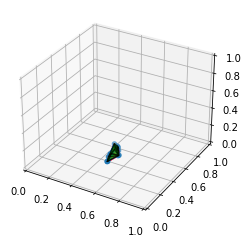

In [36]:
from modules.GeometryDesign.tent import Tent
box_points = np.array([
        [0,0,0], [1,0,0], [0,1,0], [1,1,0], # floor corners
        [0,0,1], [1,0,1], [0,1,1], [1,1,1] # Ceiling/roof corners
    ])
print(box_points.shape)

i=0
for coordenadas in var:
    print(obj[i,1])
    box_points = np.reshape(coordenadas, (15, 3))
    # Instansiate the object
    box = Tent(box_points)
    # Plot the box
    box.plot()
    i+=1